<h1 style="text-align: center;">ResNet50</h1>

## Loading the required libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Add, GlobalAveragePooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

## Loading the CIFAR-10 Dataset

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

## Creating the ResNet50 model from a scratch

In [ ]:
def residual_block(x, filters, kernel_size=3, stride=1, conv_shortcut=False):
    shortcut = x
    if conv_shortcut:
        shortcut = Conv2D(filters, kernel_size=1, strides=stride, padding='valid')(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

In [ ]:
def create_resnet50_scratch(input_shape=(32, 32, 3), num_classes=10):
    inputs = Input(shape=input_shape)

    x = Conv2D(64, 3, strides=1, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=3, strides=2, padding='same')(x)

    x = residual_block(x, 64, conv_shortcut=True)
    x = residual_block(x, 64)
    x = residual_block(x, 64)

    x = residual_block(x, 128, stride=2, conv_shortcut=True)
    x = residual_block(x, 128)
    x = residual_block(x, 128)
    x = residual_block(x, 128)

    x = residual_block(x, 256, stride=2, conv_shortcut=True)
    x = residual_block(x, 256)
    x = residual_block(x, 256)
    x = residual_block(x, 256)
    x = residual_block(x, 256)
    x = residual_block(x, 256)

    x = residual_block(x, 512, stride=2, conv_shortcut=True)
    x = residual_block(x, 512)
    x = residual_block(x, 512)

    x = GlobalAveragePooling2D()(x)
    x = Flatten()(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=x)
    return model

In [ ]:
resnet50_scratch = create_resnet50_scratch()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
resnet50_scratch.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
resnet50_scratch.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_74 (Conv2D)          (None, 32, 32, 64)           1792      ['input_3[0][0]']             
                                                                                                  
 batch_normalization_74 (Ba  (None, 32, 32, 64)           256       ['conv2d_74[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_66 (Activation)  (None, 32, 32, 64)           0         ['batch_normalization_74[0

## Training the model

In [ ]:
resnet50_history = resnet50_scratch.fit(
    train_images, train_labels,
    epochs=70,
    validation_data=(test_images, test_labels)
)

Epoch 1/70
1563/1563 [==============================] - 97s 46ms/step - loss: 1.4323 - accuracy: 0.4828 - val_loss: 1.2150 - val_accuracy: 0.5685
Epoch 2/70
1563/1563 [==============================] - 72s 46ms/step - loss: 0.9966 - accuracy: 0.6490 - val_loss: 1.0255 - val_accuracy: 0.6371
Epoch 3/70
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7674 - accuracy: 0.7317 - val_loss: 0.9443 - val_accuracy: 0.6842
Epoch 4/70
1563/1563 [==============================] - 73s 47ms/step - loss: 0.5892 - accuracy: 0.7926 - val_loss: 0.8403 - val_accuracy: 0.7175
Epoch 5/70
1563/1563 [==============================] - 70s 45ms/step - loss: 0.4362 - accuracy: 0.8486 - val_loss: 0.8893 - val_accuracy: 0.7209
Epoch 6/70
1563/1563 [==============================] - 72s 46ms/step - loss: 0.3167 - accuracy: 0.8890 - val_loss: 1.0035 - val_accuracy: 0.7091
Epoch 7/70
1563/1563 [==============================] - 70s 45ms/step - loss: 0.2329 - accuracy: 0.9177 - val_loss: 0.9490 -

## Printing the training and testing accuracy

In [ ]:
train_loss = resnet50_history.history['loss']
train_acc = resnet50_history.history['accuracy']
val_loss = resnet50_history.history['val_loss']
val_acc = resnet50_history.history['val_accuracy']

print(f"Final Training Accuracy: {train_acc[-1]*100:.2f}%")
print(f"Final Testing Accuracy: {val_acc[-1]*100:.2f}%")

Final Training Accuracy: 99.44%
Final Testing Accuracy: 78.97%


## Plotting the accuracy and loss

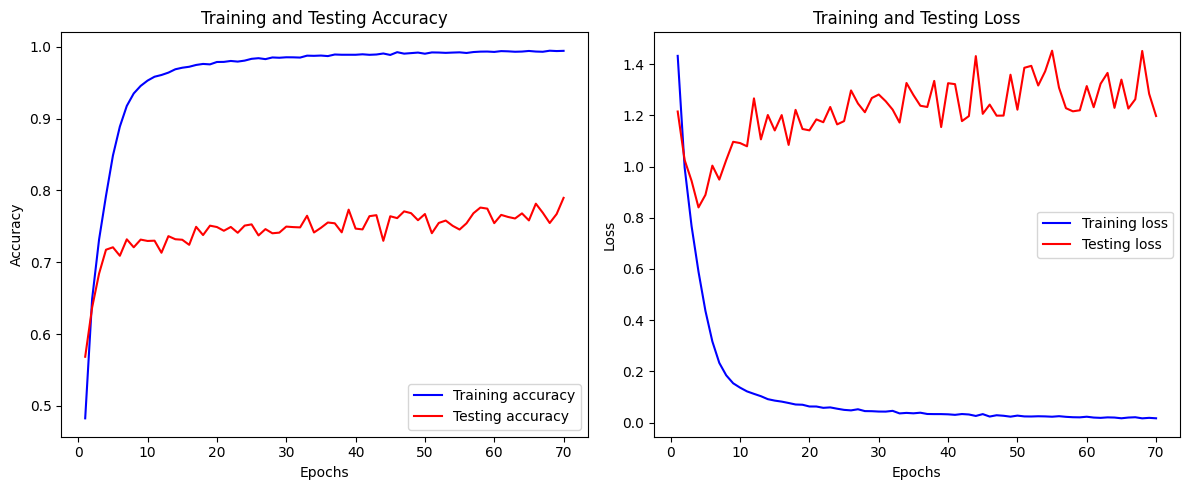

In [ ]:
import matplotlib.pyplot as plt
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'b-', label='Training accuracy')
plt.plot(epochs, val_acc, 'r-', label='Testing accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Testing loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()